# 1) Defina o que é uma Rede Neural Artificial.
### Conjunto de neurônios artificais onde cada neurônio tem como objetivo responder positivamente ou negativamente a uma entrada (estimulo), simulando o funcionamento de neurônios cerebrais.

# 2) Quais elementos (dos até então vistos) compõem uma Rede Neural Artifical? Ilustre e exemplifique.
### Perceptron e Adaline. Ambos tem como objetivo simular um neurônio específico, respondendo a estimulos. A diferença entre eles está no uso da função de ativação. Enquanto o perceptron aplica a função de ativação durante o aprendizado para averiguar se houve acerto, o Adaline aplica apenas no final do aprendizado.

![](./assets/perceptron_adaline.png)

Imagem retirada de [Sebastian Raschka](https://sebastianraschka.com/faq/docs/diff-perceptron-adaline-neuralnet.html)

# 3) O Perceptron é um classificador linear. Justifique.
### É considerado classificador linear pois a função que dita a regra de aprendizado é uma função linear: g(x) = W_0 + x . W^T, onde W representa o vetor de pesos e W_0 representa o bies.

![](./assets/graphic.png)

Imagem retirada de [David Menotti](https://www.inf.ufpr.br/menotti/ci171-182/slides/ci171-classlinear.pdf)

# 4) Qual a diferença entre o Perceptron e o Adaline?
### Respondido na questão 2.

# PARTE A. Perceptron - Conjunto de dados Iris

In [119]:
import pandas as pd

Xy = pd.read_csv('./datasets/iris_adapted.csv')

X = Xy.drop(['sepal-width', 'petal-width', 'class'], axis = 1)
y = Xy['class']

X.head()

,sepal-length,petal-length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


# Separando dados de treino e teste

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [121]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando o Perceptron com os dados de treino normalizados

In [130]:
from perceptron.perceptron import Perceptron

cls_perceptron = Perceptron()
cls_perceptron.fit(X_train_scaler, y_train)
cls_perceptron.score(X_test, y_test)

1.0

# Matriz de confusão

In [133]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_perceptron.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
vn = verdadeiros negativos, fp = falsos positivos, 
fn = falsos negativos, vp = verdadeiros positivos

[[vn, fp],
 [fn, vp]]
'''
conf_matrix

array([[19,  0],
       [ 0, 11]])

# Superfície de decisão das amostras e reta produzida pelo vetor de pesos

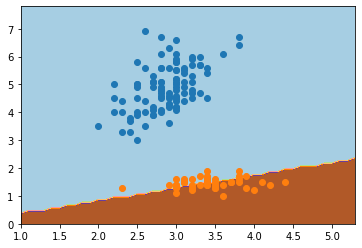

In [145]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

data = Xy[:][:].values

min1, max1 = data[:, 1:3][:, 0].min()-1, data[:, 1:3][:, 0].max()+1
min2, max2 = data[:, 1:3][:, 1].min()-1, data[:, 1:3][:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((-1*np.ones((r1.shape[0], 1)), r1, r2))
yhat = np.sum(cls_perceptron.get_weight() * grid, axis=1) >= 0
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(2):
  row_ix = np.where(data[:, -1] == class_value)
  plt.scatter(data[:, 1:3][row_ix, 0], data[:, 1:3][row_ix, 1], cmap='Paired')

plt.show()

# PARTE B. Adaline - Conjunto de dados Sintético

In [1]:
import pandas as pd
import numpy as np

X = pd.DataFrame(
    np.random.uniform(0, 99, 100), 
    columns = ['X_1']
)
y = pd.Series(
    [ 
        5 * x - 0.5 + np.random.uniform(0, 5) 
        for x in X.values 
    ]
)

# Separando os dados de treino e teste

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Treinando o Adaline

In [3]:
from adaline.adaline import Adaline

cls_adaline = Adaline(eta=0.00001)
cls_adaline.fit(X_train, y_train) # caso queira usar os dados normalizados usar o X_train_scaler

# Superfície de decisão das amostras e reta produzida pelo vetor de pesos

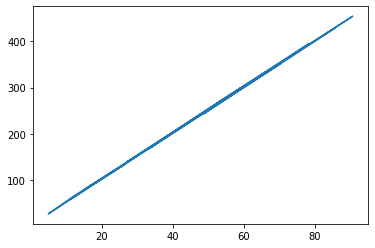

In [12]:
from matplotlib import pyplot as plt

W = cls_adaline.get_weight()

b = cls_adaline.get_bies()
w_0 = W[0]
w = W[1:]

x = X_test.values.squeeze()
# x = np.arange(X_test.min().values.min(), X_test.max().values.max())

plt.plot(x, np.dot(x, w), color = 'black')

plt.plot(X_test.values.squeeze(), y_test)
plt.show()

# PARTE C. Adaline - Conjunto de dados Resistência à compressão do concreto

In [145]:
import pandas as pd

Xy = pd.read_excel('./datasets/concrete_data.xls')

X = Xy.drop(Xy.columns[-1], axis = 1)
y = Xy[Xy.columns[-1]]

# Separando os dados de treino e teste

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [147]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando o Adaline

In [148]:
from adaline.adaline import Adaline

cls_adaline = Adaline(eta=0.00001)
cls_adaline.fit(X_train_scaler, y_train) # caso queira usar os dados normalizados usar o X_train_scaler

# Superfície de decisão e reta produzida pelo vetor de pesos

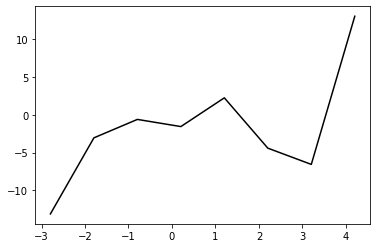

In [149]:
from matplotlib import pyplot as plt

W = cls_adaline.get_weight()

b = cls_adaline.get_bies()
w_0 = W[0]
w = W[1:]

# x = X_train_scaler.values.squeeze()
x = np.arange(X_train_scaler.min().values.min(), X_train_scaler.max().values.max())

plt.plot(x, b + x * w, color = 'black')
plt.show()

# Separando os dados de treino e teste

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# Normalizando os dados de treino

In [157]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando o Adaline

In [158]:
from adaline.adaline import Adaline

cls_adaline = Adaline(eta=0.00001)
cls_adaline.fit(X_train_scaler, y_train) # caso queira usar os dados normalizados usar o X_train_scaler

# Superfície de decisão

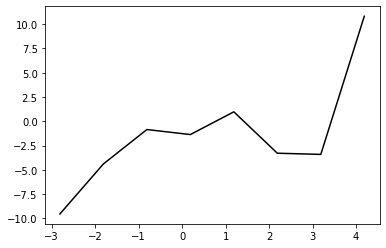

In [159]:
from matplotlib import pyplot as plt

W = cls_adaline.get_weight()

b = cls_adaline.get_bies()
w_0 = W[0]
w = W[1:]

# x = X_train_scaler.values.squeeze()
x = np.arange(X_train_scaler.min().values.min(), X_train_scaler.max().values.max())

plt.plot(x, b + x * w, color = 'black')
plt.show()